In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set('paper', palette='colorblind')
import numpy as np
from refnx import analysis
import sys

In [42]:
output_dir = '../../output/'
lipids = ['dlpc', 'dmpc', 'dppc', 'dmpg']
sp_dlpc = [20, 25, 30, 35]
sp_dmpc = [20, 25, 30, 40]
sp_dppc = [15, 20, 25, 30]
sp_dmpg = [15, 20, 25, 30]
sp = [sp_dlpc, sp_dmpc, sp_dppc, sp_dmpg]

In [38]:
def get_value(file, sp, lab):
    f = open(output_dir + lab + '/' + file + sp + '.txt', 'r')
    for line in f:
        k = line
    l = k.split('$')[1].split('^')[0]
    m = k.split('$')[1].split('^')[1].split('+')[1].split('}')[0]
    n = k.split('$')[1].split('^')[1].split('+')[1].split('-')[1][:-1]
    return float(l), float(m), float(n)

In [72]:
angles = np.zeros((4, 4))
roughs = np.zeros((4, 4))
sols = np.zeros((4, 4))
for i in range(0, len(lipids)):
    for j in range(0, len(sp[i])):
        angles[i][j] = get_value('angle', str(sp[i][j]), lipids[i])[0]
        roughs[i][j] = get_value('rough', str(sp[i][j]), lipids[i])[0]
        sols[i][j] = get_value('solh', str(sp[i][j]), lipids[i])[0]
        
kx1 = [15, 15, 10, 10]
kx2 = [40, 45, 35, 35]

In [73]:
mpl.rcParams['grid.linestyle'] = ''
mpl.rcParams['axes.labelsize']=28
mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18

def plotgraph(sp, angles, roughs, sols, x1, x2):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)


    fig, host = plt.subplots(figsize=(10, 10))
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)

    p11, = host.plot(sp, angles, c='#0173B2', marker='s', ls='', ms=10)
    p21, = par1.plot(sp, roughs, c='#DE8F05', marker='s', ls='', ms=10)
    p31, = par2.plot(sp, sols, c='#029E73', marker='s', ls='', ms=10)

    host.set_xlim(x1, x2)
    #host.set_ylim(33, 40)
    #par1.set_ylim(2.75, 4.25)
    #par2.set_ylim(42, 48)

    host.set_xlabel(r'Surface Pressure/mNm$^{-1}$')
    host.set_ylabel(r'$\theta_t$/$^\circ$')
    par1.set_ylabel(r'$\sigma_{t,h,s}$/Å')
    par2.set_ylabel(r'$\phi_h$')

    host.yaxis.label.set_color(p11.get_color())
    par1.yaxis.label.set_color(p21.get_color())
    par2.yaxis.label.set_color(p31.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p11.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p21.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p31.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)


    plt.show()

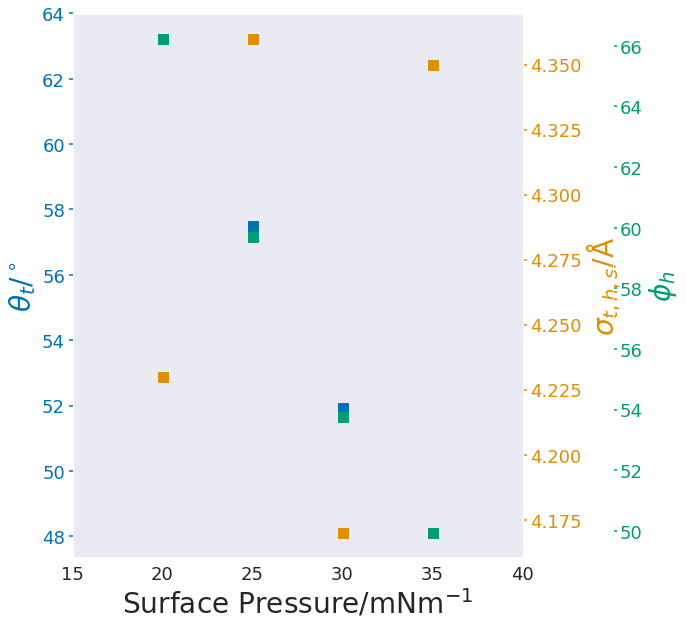

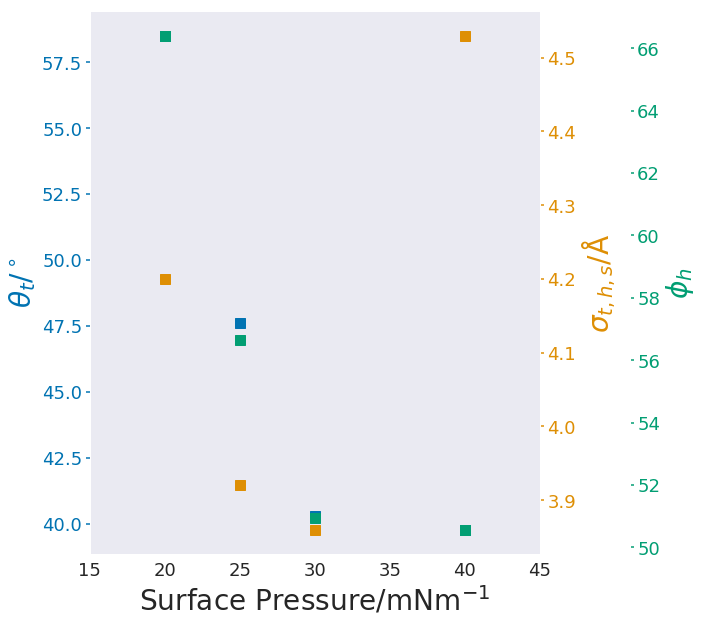

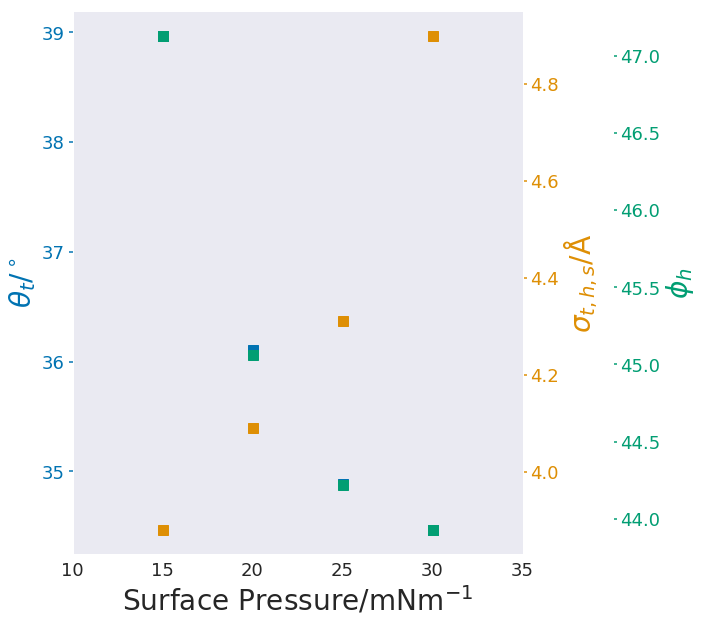

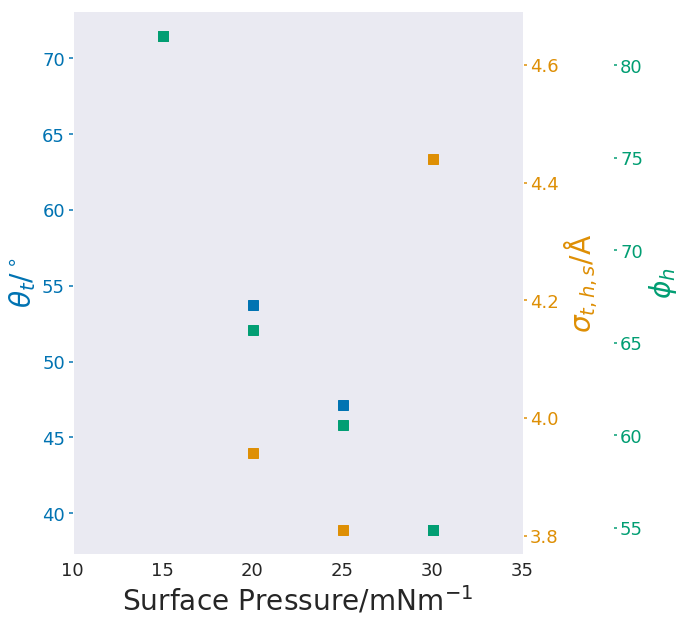

In [74]:
for i in range(0, len(lipids)):
    plotgraph(sp[i], angles[i], roughs[i], sols[i], kx1[i], kx2[i])

In [135]:
vols = {}
vols_err = {}
vols['ch3'] = np.average([55.858, 52.929])
vols_err['ch3'] = np.std([55.858, 52.929]) / np.sqrt(2)
vols['ch2'] = np.average([27.929, 26.464])
vols_err['ch2'] = np.std([27.929, 26.464]) / np.sqrt(2)
vols['gly'] = np.average([319, 360])
vols_err['gly'] = np.std([319, 360]) / np.sqrt(2)
vols['phos'] = 59
vols_err['phos'] = 2.4
vols['chol'] = 113
vols_err['chol'] = 5.0
vols['carb'] = 41
vols_err['carb'] = 1.4

In [152]:
dppc = vols['ch3'] * 2 + vols['ch2'] * 22 + vols['gly']# + vols['carb'] * 2 + vols['phos'] + vols['chol']
dppc_err = vols_err['ch3'] * 2 + vols_err['ch2'] * 22 + vols_err['gly'] #+ vols_err['carb'] * 2 + vols_err['phos'] + vols_err['chol']

In [153]:
dppc, dppc_err

(1046.6100000000001, 27.96183055524083)

In [143]:
vols['gly'], vols_err['gly']

(339.5, 14.495689014324224)